# Transfer learning 

Transfer learning это когда ты берёшь чужую модель и адаптируешь её под свою задачу. В этой тетрадке будет два примера transfer learning. Для эмбедингов и для картинок. 


##  Про tensorhub

Каждый раз, обучая нейронку, мы сначала рандомно инициализируем веса, а после в ходе бэкпропа обучаем модель. Если мы сразу же угадываем хорошие веса, модель сходится быстрее. Иногда можно брать в качестве инициализации веса, полученные другими исследователями и на их основе дообучать модель под свой выход. Это здорово упрощает задачу обучения и экономит многие часы работы. Для такого дележа в $2017$ году была придумана платформа __TensorFlow Hub.__ 

Сегодня с помощью этой платформы разработчики делятся друг с другом уже готовыми предобученными весами. Для работы библиотеки нужна версия tensorflow выше `1.7`. Инструкцию по установке можно найти на [сайте tensorflow.](https://www.tensorflow.org/hub/installation)

В случае проблем с установкой, повысить версию tensorflow до актуальной помогает команда:

```python3 -m pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.12.0-py3-none-any.whl```


In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)

1.12.0


## 1. ELMO-эмбединги.


[ ](https://simkl.in/fanart/17/17052285f7e1391f7_0.jpg)

Пробуем воспользоваться хабом. Скачаем [модель от IPavlov с эмбедингами для русскоязычных новостей.](http://docs.deeppavlov.ai/en/master/intro/pretrained_vectors.html) Примеры использования хаба с моделями IPavlov можно найти [в документации.](http://docs.deeppavlov.ai/en/latest/apiref/models/embedders.html#deeppavlov.models.embedders.elmo_embedder.ELMoEmbedder)

In [2]:
# подгружаем модель
elmo = hub.Module("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz")



INFO:tensorflow:Using /var/folders/r2/6lthpk110g7d1kjwlgx6p7100000gn/T/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz'.
INFO:tensorflow:Downloading http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz: 30.02MB
INFO:tensorflow:Downloading http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz: 60.02MB
INFO:tensorflow:Downloading http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz: 90.02MB
INFO:tensorflow:Downloading http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz: 120.02MB
INFO:tensorflow:Downloading http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz: 150.02MB
INFO:tensorflow:Downloading http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz: 180.02MB
INFO:tensorflow:Downloading http://files.deepp

Запускаем сессию в tensorflow и применяем к чему-нибудь предобученную нейросетку.

In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

embeddings = elmo(["это предложение", "word"], signature="default", as_dict=True)["elmo"]
sess.run(embeddings)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


array([[[ 0.05817385,  0.22493355, -0.1920293 , ..., -0.14448947,
         -0.1242556 ,  1.0148408 ],
        [ 0.5359629 ,  0.28685376,  0.28028587, ..., -0.08028417,
          0.4908908 ,  0.75939935]],

       [[ 0.34336394,  1.0031183 , -0.15972564, ...,  1.2442503 ,
          0.6102935 ,  0.43388352],
        [ 0.05370751,  0.02260921,  0.01074906, ...,  0.08748816,
         -0.0066415 , -0.01344293]]], dtype=float32)

Также hub поддерживает токенизированный формат.

In [4]:
tokens_input = [["мама", "мыла", "раму"], ["рама", "", ""]]
tokens_length = [3, 1]
embeddings = elmo(
    inputs={
            "tokens": tokens_input,
            "sequence_len": tokens_length
            },
    signature="tokens",
    as_dict=True)["elmo"]

sess.run(embeddings)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


array([[[ 0.60400033, -0.16130012,  0.5647884 , ..., -0.00376102,
         -0.0382006 ,  0.26321295],
        [ 0.01834123,  0.17055827,  0.5311495 , ..., -0.56755346,
          0.62669814, -0.05939047],
        [ 0.32425952,  0.17909637,  0.01657113, ...,  0.1866094 ,
          0.7392498 ,  0.08285775]],

       [[ 1.1322286 ,  0.19077665, -0.17811388, ...,  0.42973173,
          0.23391487, -0.01294377],
        [ 0.05370751,  0.02260921,  0.01074906, ...,  0.08748816,
         -0.0066415 , -0.01344293],
        [ 0.05370751,  0.02260921,  0.01074906, ...,  0.08748816,
         -0.0066415 , -0.01344293]]], dtype=float32)

In [9]:
embeddings.shape

TensorShape([Dimension(None), Dimension(None), Dimension(1024)])

Кроме новостей в [документации проекта можно найти](http://docs.deeppavlov.ai/en/master/intro/pretrained_vectors.html) википедию, русскоязычный твиттер и многие другие эмбединги. Там же можно найти довольно много полноценных классификаторов. 

Чуть ниже мы попробуем впихнуть предобученный embeddig слой в нашу собственную нейросетку. Пока посмотрим на пример transfer learning с картинками и Imagenet. 

## 2. Дообучение сетки под картинки

Теперь давайте попробуем решить другую задачу, связанную с классификацией картинок. 

### 2.1 Данные и применение нейросетки

Для этого примера будем использовать [датасет с цветами.](https://www.tensorflow.org/tutorials/images/hub_with_keras) Для начала скачаем его на свой компьютер. 

In [10]:
data_root = tf.keras.utils.get_file(
  'flower_photos',
  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 124s 1us/step


In [13]:
# А куда всё скачалось то? 
data_root

'/Users/fulyankin/.keras/datasets/flower_photos'

Подготовим генератор для картинок. Он будет предобрабатывать их, деля каждый пиксель на $255$, засовывать в сетку, а после выплёвывать из оперативки.

In [11]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root))

Found 3670 images belonging to 5 classes.


Посмотрим на характеристики батчей, который мы задали внутри генератора. 

In [14]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Labe batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 256, 256, 3)
Labe batch shape:  (32, 5)


Для transfer learning будем использовать что-нибудь свеженькое. Например, архитектуру [MobileNetV2,](https://arxiv.org/abs/1801.04381) обученную Google в апреле 2018 года на ImageNet. Эта сетка - развитие Inception. В детали углубляться не будем :) 

Будем имплиментировать нашу нейросетку внутрь Keras с помощью [лямбда-слоя.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Lambda) С помощью такого слоя можно сделать частью нейросетки любое придуманное нами выражение. 

In [20]:
from tensorflow.keras import layers

# Ссылка на модель на хабе
classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2" 

# завернём модель в функцию и попробуем применить к какой-нибудь рандомной фотке
def classifier(x):
    classifier_module = hub.Module(classifier_url)
    return classifier_module(x)

# выясняем с какими размерностями работает модель
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))
  
# собираем нейросетку, где в качестве первого слоя берём нейросетку classifier
classifier_layer = layers.Lambda(classifier, input_shape = IMAGE_SIZE+[3])
classifier_model = tf.keras.Sequential([classifier_layer])
classifier_model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1001)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [22]:
# потому что три канала
IMAGE_SIZE + [3]

[224, 224, 3]

Немного переделаем наш генератор изображений так, чтобы размер его вывода совпадал с ожидаемым нейросетью.

In [23]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)

for image_batch,label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Labe batch shape: ", label_batch.shape)
    break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


Инициализируем наш лямбда-модуль.

In [24]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)

Попробуем запустить нейросетку на каких-нибудь изображениях. Один из примеров такого изображения лежит [по ссылке](https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg)

65536/61306 [================================] - 0s 1us/step


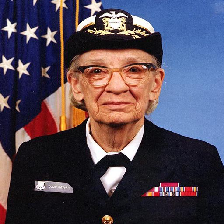

In [25]:
import numpy as np
import PIL.Image as Image

href = 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'
grace_hopper = tf.keras.utils.get_file('image.jpg',href)

grace_hopper = Image.open(grace_hopper).resize(IMAGE_SIZE)
grace_hopper 

In [26]:
# немного предобработки
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [28]:
# вот так можно добавить фиктивную размерность
grace_hopper[np.newaxis, ...].shape

(1, 224, 224, 3)

Закидываем изображение в классификатор и получаем в ответ кучу вероятностей.

In [27]:
result = classifier_model.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

Смотрим какая вероятность максимальна.

In [29]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

Осталось только понять что это за класс такой. Для этого скачаем метки классов для ImageNet.

In [30]:
labels_href = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', labels_href)
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


И посмотрим на результат прогноза

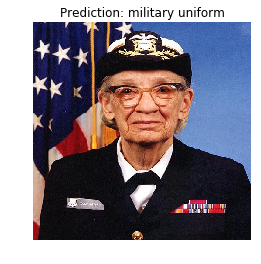

In [35]:
import matplotlib.pylab as plt

plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name)
plt.show()

Military uniform. Очень недурно. Давайте попробуем провернуть то же самое с каким-нибудь своим изображением. 

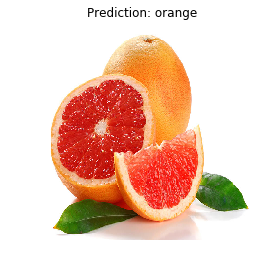

In [40]:
def what_class_is_it(href, save_name):
    image = tf.keras.utils.get_file(save_name, href)
    image = Image.open(image).resize(IMAGE_SIZE)
    image = np.array(image)/255.0
    result = classifier_model.predict(image[np.newaxis, ...])
    predicted_class = np.argmax(result[0], axis=-1)

    plt.imshow(image)
    plt.axis('off')
    predicted_class_name = imagenet_labels[predicted_class]
    plt.title("Prediction: " + predicted_class_name)
    plt.show()
    pass

href = 'https://static-eu.insales.ru/images/products/1/7397/80076005/greipfrut.jpeg'
what_class_is_it(href, 'image1.jpg')

24576/18626 [=======================================] - 0s 0us/step


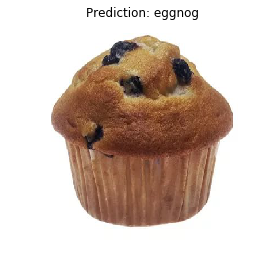

In [42]:
href = 'https://im0-tub-ru.yandex.net/i?id=d91cfc56104c355d83f30a096361a3dd&n=13&exp=1'
what_class_is_it(href, 'image2.jpg')

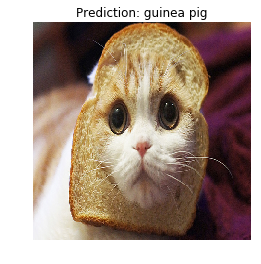

In [50]:
href = 'http://downtown.ru/files/blogs/8800/37876/medium_7db98dbd0bf79e63253f96a89a60eebb808.jpg'
what_class_is_it(href, 'image3.jpg')

Кстати говоря, можно вместо грубого искажения картинки командой .reshape, по-нормальному обрезать её с помощью numpy до квадратных размеров, и уже потом делать reshape.

<img src="https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/week3/images/center_crop.jpg" style="width:50%">

Попробуйте самостоятельно написать функцию для этого в качестве домашнего задания. А мы тем временем запустим классификатор на батче из изображений. 

In [55]:
result_batch = classifier_model.predict(image_batch)

labels_batch = imagenet_labels[np.argmax(result_batch, axis=-1)]
labels_batch

array(['pot', 'daisy', 'buckeye', 'picket fence', 'rapeseed', 'daisy',
       'daisy', 'mask', 'daisy', 'pot', 'pot', "jack-o'-lantern", 'lemon',
       'greenhouse', 'daisy', 'sea urchin', 'picket fence', 'stinkhorn',
       'picket fence', 'daisy', 'daisy', 'coral fungus', 'confectionery',
       'daisy', 'ant', 'face powder', 'bee', 'daisy', 'pot', 'pot',
       'vase', 'coral fungus'], dtype='<U30')

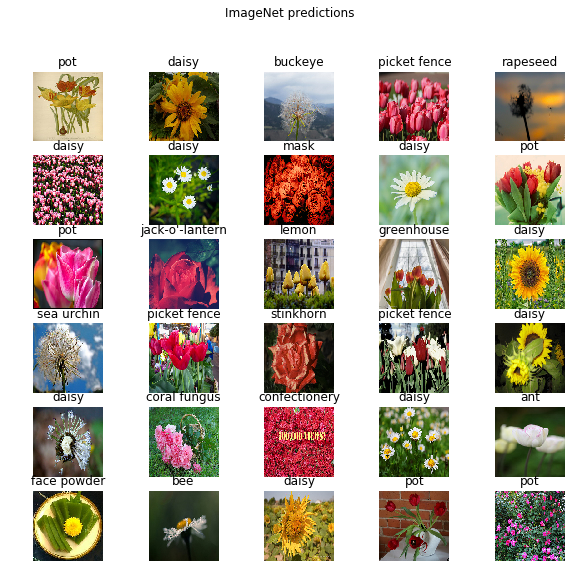

In [59]:
plt.figure(figsize=(10,9))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(labels_batch[n])
    plt.axis('off')
    plt.suptitle("ImageNet predictions")    
plt.show()

Результаты далеки от совершенства, но разумны, учитывая, что это не те классы, для которых обучалась модель (кроме "daisy").

## 2.2 Дообучаем сетку

In [60]:
# нам для дообучения понадобится только feature extractor, скачаем его в hub 
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2"

# завернём как и выше в функцию 
def feature_extractor(x):
    feature_extractor_module = hub.Module(feature_extractor_url)
    return feature_extractor_module(x)

# и вытащим размерности для входа
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(feature_extractor_url))

INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2'.
INFO:tensorflow:Downloaded https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2, Total size: 10.35MB
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2'.


Ещё раз убедимся, что с генератором всё в порядке и он выдаёт нам нужные размерности.

In [61]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)

for image_batch,label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Labe batch shape: ", label_batch.shape)
    break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


In [62]:
# Оформляем feature_extractor как отдельный слой для сетки
features_extractor_layer = layers.Lambda(feature_extractor, input_shape=IMAGE_SIZE+[3])

In [63]:
# запрещаем нейросетке тренировать этот слой
features_extractor_layer.trainable = False

In [64]:
# собираем модель, на последний слой вытаскиваем softmax на 5 классов
model = tf.keras.Sequential([
  features_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 6,405
Trainable params: 6,405
Non-trainable params: 0
_________________________________________________________________


In [65]:
# инициализация весов
init = tf.global_variables_initializer()
sess.run(init)

In [66]:
# проверяем запускается ли модель, которую мы собрали и что она выдаёт на выходе
result = model.predict(image_batch)
result.shape

(32, 5)

In [70]:
# компилируем модель
model.compile(
  optimizer=tf.train.AdamOptimizer(), 
  loss='categorical_crossentropy',
  metrics=['accuracy'])

# будем собирать все данные об обучении на каждом батче в 
# специальный колбэк (помните, у нас был колбэк - early_stoping) 
# и я говорил, что можно писать свои колбэки на любой вкус и цвет,
# чтобы как-то наблюдать или контролировать обучение

class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []

    def on_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])


# число шагов до конца первой эпохи
steps_per_epoch = image_data.samples//image_data.batch_size

batch_stats = CollectBatchStats() # объявили колбэк

# учим сетку одну эпоху
model.fit((item for item in image_data), 
                    epochs=1, 
                    steps_per_epoch = steps_per_epoch,
                    callbacks = [batch_stats])

Epoch 1/1
114/114 [==============================] - 130s 1s/step - loss: 0.6820 - acc: 0.7421


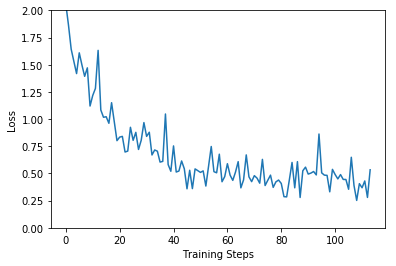

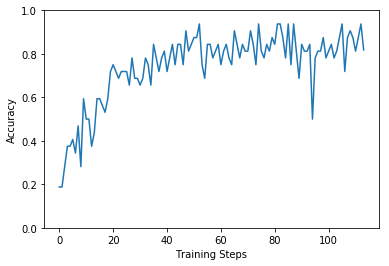

In [73]:
# вытаскиваем из колбэка информацию про обучение сетки 
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

plt.show()

Строим прогнозы.

In [74]:
label_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [75]:
result_batch = model.predict(image_batch)

labels_batch = label_names[np.argmax(result_batch, axis=-1)]
labels_batch

array(['Dandelion', 'Daisy', 'Daisy', 'Sunflowers', 'Dandelion', 'Tulips',
       'Daisy', 'Tulips', 'Roses', 'Tulips', 'Daisy', 'Tulips', 'Tulips',
       'Dandelion', 'Daisy', 'Roses', 'Dandelion', 'Dandelion', 'Tulips',
       'Tulips', 'Dandelion', 'Daisy', 'Dandelion', 'Sunflowers', 'Roses',
       'Daisy', 'Dandelion', 'Tulips', 'Tulips', 'Daisy', 'Sunflowers',
       'Tulips'], dtype='<U10')

Рисуем их на картинке.

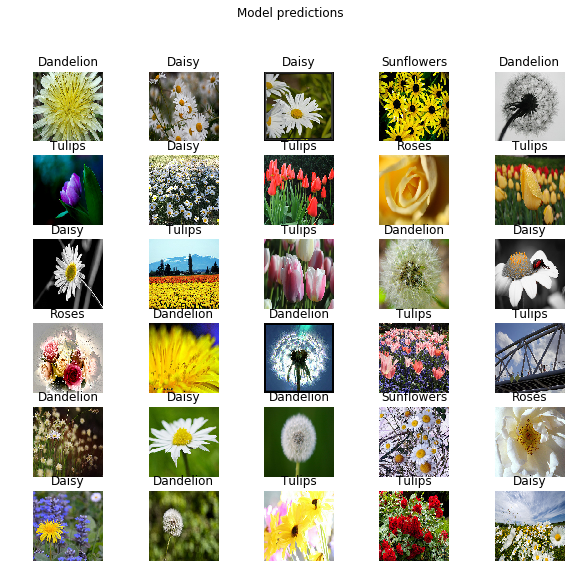

In [76]:
plt.figure(figsize=(10,9))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(labels_batch[n])
    plt.axis('off')
    plt.suptitle("Model predictions")

plt.show()

Сохраняем дообученную сетку на свой компьютер.

In [77]:
export_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")
export_path

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Saver not created becau

b'./saved_models/1549824530'

# 3. Впихиваем в свою нейронку предобученный embedding

Аналогично можно делать с абсолютно любыми нейросетками и слоями. Например, давайте попробуем имплиментировать предобученный Google ELMO embeddig слой внутрь сетки. В качестве примера возьмём корпус из imdb отзывов о фильмах.

In [103]:
from keras.datasets import imdb

# Про опции подгрузки выборки подробнее в документации: 
# https://keras.io/datasets/
NUM_WORDS = 25000 # использовать только 25000 самых встречаемых слов

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k : v for k,v in word_to_id.items()}

id_to_word = {value : key for key,value in word_to_id.items()}

X_train = [' '.join([id_to_word[i] for i in item]) for item in X_train]
X_test = [' '.join([id_to_word[i] for i in item]) for item in X_test]

In [104]:
# пример отзыва
X_train[0]

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when fro

In [120]:
# какой отзыв
y_train[0]

1

Если я правильно понял [инфомрацию с github по tensofglow hub,](https://github.com/tensorflow/hub/issues/155) также просто как для картинок, embedding слой внутрь сетки завернуть не получится. Однако на просторах интернета [можно найти](https://towardsdatascience.com/elmo-embeddings-in-keras-with-tensorflow-hub-7eb6f0145440)  готовые классы для имплиментации хаба их эмбеддингов в сетку. Если сможете сделать это проще, расскажите мне как.

In [127]:
from keras.engine import Layer
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model

class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable=True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable,
                               name="{}_module".format(self.name))

        self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None):
        result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                      as_dict=True,
                      signature='default',
                      )['default']
        return result

    def compute_mask(self, inputs, mask=None):
        return K.not_equal(inputs, '--PAD--')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dimensions)

Собираем с этим, вручную собранным слоем, нейросетку.

In [128]:
def build_model(): 
    input_text = layers.Input(shape=(1,), dtype="string")
    embedding = ElmoEmbeddingLayer()(input_text)
    dense = layers.Dense(256, activation='relu')(embedding)
    pred = layers.Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[input_text], outputs=pred)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [129]:
model = build_model()
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_2 (Elmo (None, 1024)              4         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 262,661
Trainable params: 262,661
Non-trainable params: 0
_________________________________________________________________


Обучаем одну долгую эпоху. 

In [ ]:
sess = tf.Session()
K.set_session(sess)

model.fit(X_train, 
          y_train,
          validation_data=(X_test, y_test),
          epochs=1,
          batch_size=32)

Мы выставили для эмбедингов параметр так, что слой тренируемый. Это не очень хорошая идея. Обучение будет идти очень долго. Конечно же к обучению можно прикрутить любые колбэки, построить любые картинки и многое другое. Ещё можно сохранить модель, а также посмотреть на её качество.

In [ ]:
model.save('ElmoModel.h5') # Сохранение модели
pre_save_preds = model.predict(X_text[0:100]) # Прогнозы модель

# Подгрузка модели и её стройка
model = None
model = build_model()
model.load_weights('ElmoModel.h5')

post_save_preds = model.predict(test_text[0:100]) # прогнозы после подгрузки
all(pre_save_preds == post_save_preds) # Конечно же они совпадают :) 